# EE-769 Term Project
## Presenters: 
Abdul Wajed  Farhat
    (Department of Civil Engineering)
    22D0306@iitb.ac.in

Omar Kashmar
    (Department of Aerospace Engineering)
    213011004@iitb.ac.in


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://www.data.qld.gov.au/dataset/burnett-river-monitoring-data-historical

data=pd.read_csv("D:\\Hourly_data.csv")

data.head(5)

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
0,4.70,5.700,88.50,43.510,7.730,30.460,3.70
1,5.55,5.785,89.80,43.520,7.755,30.420,1.90
2,5.30,5.735,89.00,43.650,7.755,30.340,2.75
3,5.60,5.665,87.70,43.760,7.755,30.175,2.50
4,5.80,5.775,89.65,44.295,7.785,30.185,4.65


In [3]:
data.describe()

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
count,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000
mean,6.300544,6.648978,91.101502,37.817511,7.838370,24.367914,12.296035
std,4.386054,0.862679,10.987095,13.066689,0.175836,3.581589,25.350311
min,0.100000,3.960000,49.850000,0.087500,6.740000,16.150000,0.100000
25%,2.950000,6.095000,84.700000,33.970000,7.740000,20.995000,3.950000
50%,5.386980,6.605000,89.900000,43.510000,7.845000,24.715000,7.050000
75%,8.800000,7.120000,96.100000,46.695000,7.945000,27.500000,11.250000
max,34.800000,13.880000,183.300000,50.960000,8.575000,32.630000,497.250000


In [4]:
data.isna().sum()

Chloraphylla ugL    0
DO mg               0
DO Sat              0
EC mScm             0
pH                  0
Temp degC           0
Turbidity NTU       0
dtype: int64

# Dealing with outliers

Text(0.5, 1.0, 'pH')

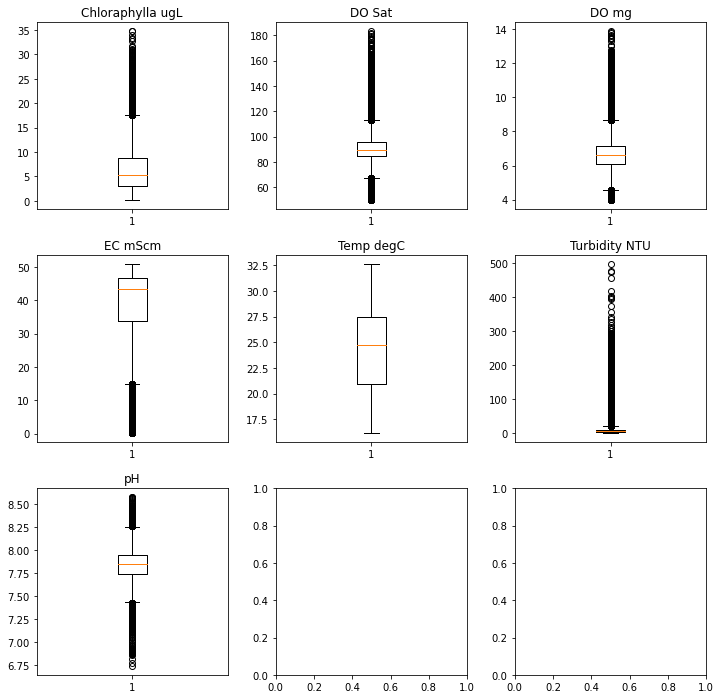

In [5]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(data['Chloraphylla ugL'])
ax[0][0].set_title('Chloraphylla ugL')

ax[0][1].boxplot(data['DO Sat'])
ax[0][1].set_title('DO Sat')

ax[0][2].boxplot(data['DO mg'])
ax[0][2].set_title('DO mg')

ax[1][0].boxplot(data['EC mScm'])
ax[1][0].set_title('EC mScm')

ax[1][1].boxplot(data['Temp degC'])
ax[1][1].set_title('Temp degC')

ax[1][2].boxplot(data['Turbidity NTU'])
ax[1][2].set_title('Turbidity NTU')

ax[2][0].boxplot(data['pH'])
ax[2][0].set_title('pH')

In [6]:
for i in data.columns:    
    dt=np.array(data[i])
    Q1=np.percentile(dt,25)
    Q3=np.percentile(dt,75)
    IQ=Q3-Q1
    upper=Q3+1.5*IQ
    lower=Q1-1.5*IQ

    dt[(dt[:]>upper) | (dt[:]<lower)]=np.nan
    data[i]=dt


In [7]:
data.isna().sum()

Chloraphylla ugL     909
DO mg                876
DO Sat              1506
EC mScm             3773
pH                  1372
Temp degC              0
Turbidity NTU       3165
dtype: int64

In [8]:
data

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
0,4.70,5.700,88.50,43.510,7.730,30.460,3.70
1,5.55,5.785,89.80,43.520,7.755,30.420,1.90
2,5.30,5.735,89.00,43.650,7.755,30.340,2.75
3,5.60,5.665,87.70,43.760,7.755,30.175,2.50
4,5.80,5.775,89.65,44.295,7.785,30.185,4.65
...,...,...,...,...,...,...,...
39953,10.05,7.490,NaN,48.550,7.875,27.610,8.10
39954,8.30,7.450,112.55,48.410,7.875,27.525,5.75
39955,7.30,7.450,112.65,48.660,7.900,27.525,4.55
39956,4.85,7.335,111.05,48.980,7.900,27.510,3.55


In [9]:
# Filling the outliers using interpolation method
data=data.interpolate(method='linear', axis=0)
data.isna().sum()

Chloraphylla ugL    0
DO mg               0
DO Sat              0
EC mScm             0
pH                  0
Temp degC           0
Turbidity NTU       0
dtype: int64

Text(0.5, 1.0, 'pH')

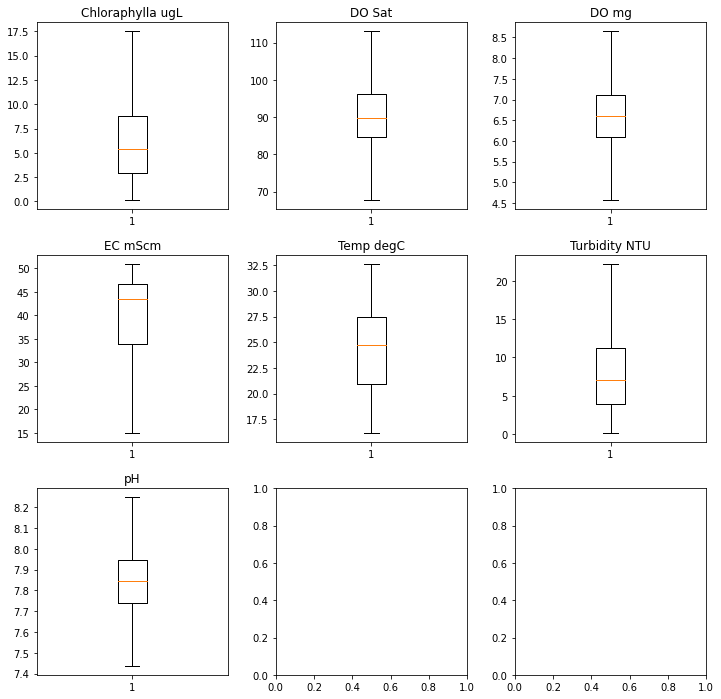

In [11]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(data['Chloraphylla ugL'])
ax[0][0].set_title('Chloraphylla ugL')

ax[0][1].boxplot(data['DO Sat'])
ax[0][1].set_title('DO Sat')

ax[0][2].boxplot(data['DO mg'])
ax[0][2].set_title('DO mg')

ax[1][0].boxplot(data['EC mScm'])
ax[1][0].set_title('EC mScm')

ax[1][1].boxplot(data['Temp degC'])
ax[1][1].set_title('Temp degC')

ax[1][2].boxplot(data['Turbidity NTU'])
ax[1][2].set_title('Turbidity NTU')

ax[2][0].boxplot(data['pH'])
ax[2][0].set_title('pH')

Text(0.5, 1.0, 'Water Quality Data')

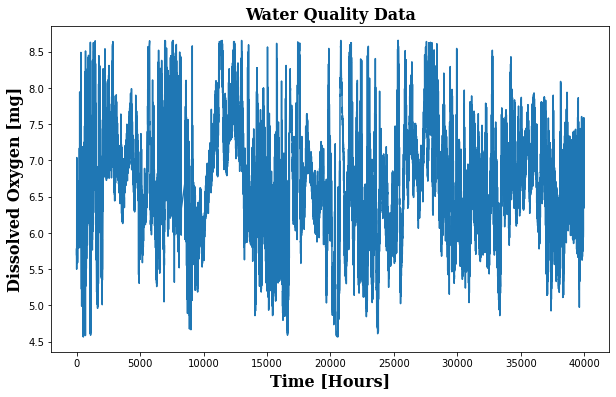

In [15]:
# Looking into the time series plot of the data

plt.figure(figsize=(10,6))
plt.plot(data['DO mg'])

plt.xlabel('Time [Hours]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Dissolved Oxygen [mg]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Water Quality Data',fontsize=16, fontweight='bold',fontfamily='serif')

In [16]:
dt_arr=np.array(data)
dt_arr

array([[  4.7  ,   5.7  ,  88.5  , ...,   7.73 ,  30.46 ,   3.7  ],
       [  5.55 ,   5.785,  89.8  , ...,   7.755,  30.42 ,   1.9  ],
       [  5.3  ,   5.735,  89.   , ...,   7.755,  30.34 ,   2.75 ],
       ...,
       [  7.3  ,   7.45 , 112.65 , ...,   7.9  ,  27.525,   4.55 ],
       [  4.85 ,   7.335, 111.05 , ...,   7.9  ,  27.51 ,   3.55 ],
       [  3.8  ,   7.125, 107.95 , ...,   7.89 ,  27.485,   3.8  ]])

# Preprocessing of the data (Normalization) 

In [17]:
from sklearn.preprocessing import minmax_scale
scaler=minmax_scale

C:\Users\Abdul Wajed Farhat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
for i in range (dt_arr.shape[1]):
    dt_arr[:,i]=scaler(dt_arr[:,i])

# Reconstruction of the data for LSTM

In [19]:
# For Phase space reconstruction 

def create_dataset(data,time_window, label):   # time_window : The number of time steps you want the model to look back
                                               # label       : The column address of the target value
    X,Y=[],[]

    for i in range (len(data)-time_window-1) :
        
        a=data[i:i+time_window,0:data.shape[1]]
        X.append(a)
        Y.append(data[i+time_window,label])
        
    return (np.array(X),np.array(Y))

In [20]:
# Splitting the data into train and test
dt_train, dt_test= dt_arr[0:round(0.75*len(dt_arr))] ,  dt_arr[round(0.75*len(dt_arr)):]                                                                            

In [21]:
X_train,Y_train=create_dataset(dt_train, 100,1)
X_test, Y_test=create_dataset(dt_test,100,1)

In [22]:
X_train.shape,Y_train.shape

((29867, 100, 7), (29867,))

# Defining the model

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [44]:
model=Sequential()
model.add(LSTM(100, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,'linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
934/934 [==============================] - 74s 77ms/step - loss: 0.0054
Epoch 2/10
934/934 [==============================] - 76s 81ms/step - loss: 0.0017
Epoch 3/10
934/934 [==============================] - 76s 82ms/step - loss: 0.0015
Epoch 4/10
934/934 [==============================] - 82s 88ms/step - loss: 0.0015
Epoch 5/10
934/934 [==============================] - 76s 81ms/step - loss: 0.0015
Epoch 6/10
934/934 [==============================] - 84s 90ms/step - loss: 0.0015
Epoch 7/10
934/934 [==============================] - 85s 91ms/step - loss: 0.0014
Epoch 8/10
934/934 [==============================] - 101s 108ms/step - loss: 0.0014
Epoch 9/10
934/934 [==============================] - 96s 103ms/step - loss: 0.0014
Epoch 10/10
934/934 [==============================] - 87s 93ms/step - loss: 0.0014


In [46]:
Y_pred=model.predict(X_test)

310/310 [==============================] - 11s 36ms/step


In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
print ('R-Squared:',r2_score(Y_test,Y_pred))
print ('Mean squared error:', mean_squared_error (Y_pred, Y_test))

R-Squared: 0.9603230146408063
Mean squared error: 0.0008080962382811547


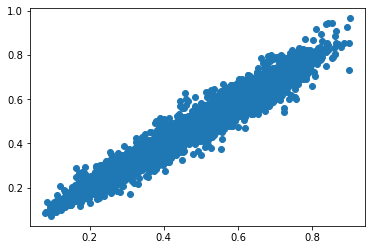

In [50]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred, Y_test)

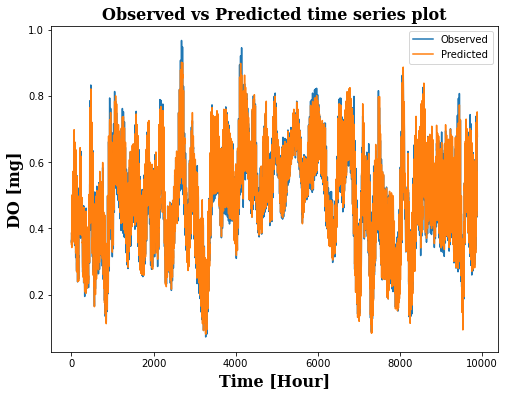

In [52]:
plt.figure(figsize=(8,6))

plt.plot(Y_test)
plt.plot(Y_pred)



plt.xlabel('Time [Hour]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('DO [mg]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Observed vs Predicted time series plot',fontsize=16, fontweight='bold',fontfamily='serif')
plt.legend(['Observed','Predicted'])

# Forecasting for one dimensional dataset

In [58]:
dtrain, dtest= dt_arr[0:round(0.75*len(dt_arr)),1] ,  dt_arr[round(0.75*len(dt_arr)):,1]

Xtrain,Ytrain=create_dataset(dtrain[:,np.newaxis],100,0)
Xtest, Ytest=create_dataset(dtest[:,np.newaxis],100,0)

In [61]:
Xtest.shape, Ytest.shape

((9889, 100, 1), (9889,))

In [62]:
model1=Sequential()
model1.add(LSTM(100, activation='relu',input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model1.add(Dense(1,'linear'))
model1.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
model1.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
934/934 [==============================] - 86s 90ms/step - loss: 0.1419
Epoch 2/10
934/934 [==============================] - 83s 89ms/step - loss: 0.0042
Epoch 3/10
934/934 [==============================] - 95s 102ms/step - loss: 0.0021
Epoch 4/10
934/934 [==============================] - 92s 98ms/step - loss: 0.0017
Epoch 5/10
934/934 [==============================] - 88s 94ms/step - loss: 0.0016
Epoch 6/10
934/934 [==============================] - 85s 91ms/step - loss: 0.0015
Epoch 7/10
934/934 [==============================] - 83s 89ms/step - loss: 0.0015
Epoch 8/10
934/934 [==============================] - 86s 92ms/step - loss: 0.0015
Epoch 9/10
934/934 [==============================] - 88s 95ms/step - loss: 0.0015
Epoch 10/10
934/934 [==============================] - 94s 100ms/step - loss: 0.0014


In [64]:
Ypredd=model1.predict(Xtest)

310/310 [==============================] - 10s 30ms/step


In [75]:

print ('R-Squared:',r2_score(Ytest,Ypredd))
print ('Mean squared error:', mean_squared_error (Ytest, Ypredd))

R-Squared: 0.958258263854811
Mean squared error: 0.0008501487613759857


# Forecasting using attention mechanism

In [66]:
import keras
from keras import layers
import tensorflow as tf


In [67]:
def lstm_attention_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    
    # LSTM layer
    lstm = layers.LSTM(100, return_sequences=True)(inputs)
    
    # Attention mechanism
    attention = layers.Dense(1, activation='tanh')(lstm)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(100)(attention)
    attention = layers.Permute([2, 1])(attention)
    attention = layers.Multiply()([lstm, attention])
    attention = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention)
    
    # Output layer
    outputs = layers.Dense(1)(attention)
    
    # Compile the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mse', optimizer='adam')
    
    return model

In [68]:
model2=lstm_attention_model(input_shape=(100,1))

In [72]:
model2.fit(Xtrain, Ytrain, epochs=20)

Epoch 1/20
934/934 [==============================] - 84s 90ms/step - loss: 0.0029
Epoch 2/20
934/934 [==============================] - 106s 114ms/step - loss: 0.0025
Epoch 3/20
934/934 [==============================] - 119s 128ms/step - loss: 0.0023
Epoch 4/20
934/934 [==============================] - 129s 139ms/step - loss: 0.0021
Epoch 5/20
934/934 [==============================] - 113s 121ms/step - loss: 0.0020
Epoch 6/20
934/934 [==============================] - 113s 121ms/step - loss: 0.0018
Epoch 7/20
934/934 [==============================] - 120s 128ms/step - loss: 0.0018
Epoch 8/20
934/934 [==============================] - 120s 129ms/step - loss: 0.0017
Epoch 9/20
934/934 [==============================] - 117s 125ms/step - loss: 0.0016
Epoch 10/20
934/934 [==============================] - 119s 127ms/step - loss: 0.0015
Epoch 11/20
934/934 [==============================] - 108s 116ms/step - loss: 0.0014
Epoch 12/20
934/934 [==============================] - 108s 115ms

In [73]:
Ypred=model2.predict(Xtest)

310/310 [==============================] - 11s 35ms/step


In [74]:
r2_score(Ytest,Ypred)

0.9657509440589186